In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
data = pd.read_csv('../data/NBA_Players.csv')
data

,Year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,PF,PTS,Potw,APG_Leader,Most_Valuable_Player,PPG_Leader,RPG_Leader,Rookie_of_the_Year,WS_Leader,Salary
0,1991,Alaa Abdelnaby,PF,22.0,POR,43,0,6.7,1.3,2.7,...,0.9,3.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,395000
1,1991,Mahmoud Abdul-Rauf,PG,21.0,DEN,67,19,22.5,6.2,15.1,...,2.2,14.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1660000
2,1991,Mark Acres,C,28.0,ORL,68,0,19.3,1.6,3.1,...,3.2,4.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,437000
3,1991,Michael Adams,PG,28.0,DEN,66,66,35.5,8.5,21.5,...,2.5,26.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,825000
4,1991,Mark Aguirre,SF,31.0,DET,78,13,25.7,5.4,11.7,...,2.7,14.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1115000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8998,2019,Delon Wright,PG,26.0,TOR,49,2,18.3,2.6,6.0,...,1.1,6.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2536898
8999,2019,Guerschon Yabusele,PF,23.0,BOS,41,1,6.1,0.9,1.9,...,0.8,2.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2667600
9000,2019,Thaddeus Young,PF,30.0,IND,81,81,30.7,5.5,10.4,...,2.4,12.6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13764045
9001,2019,Trae Young,PG,20.0,ATL,81,81,30.9,6.5,15.5,...,1.7,19.1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5356440


# Salary v.s. (Stats & Titles)

In [3]:
features_stats = data[['G','GS','FG%','3P%','2P%','eFG%','FT%','TRB','AST','STL','BLK','TOV','PF']]
features_title = data[['Potw','APG_Leader','Most_Valuable_Player','PPG_Leader','RPG_Leader','Rookie_of_the_Year','WS_Leader']]
salary = data['Salary']
features_title.head()

,Potw,APG_Leader,Most_Valuable_Player,PPG_Leader,RPG_Leader,Rookie_of_the_Year,WS_Leader
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0


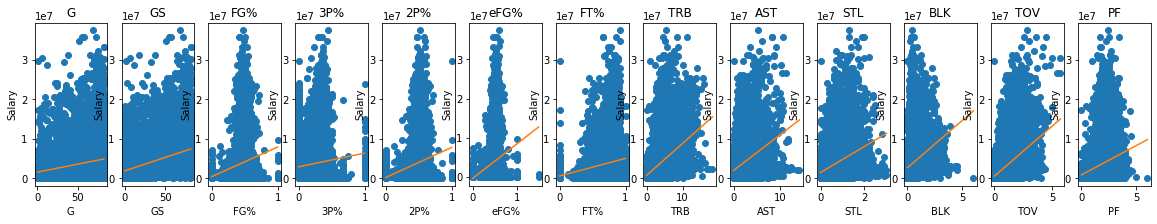

In [4]:
#scatter plot
plt.figure(figsize=(20, 3))


# i: index
for i, col in enumerate(features_stats.columns):
    plt.subplot(1, 13, i+1)
    x = features_stats[col]
    y = salary
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Salary')
    

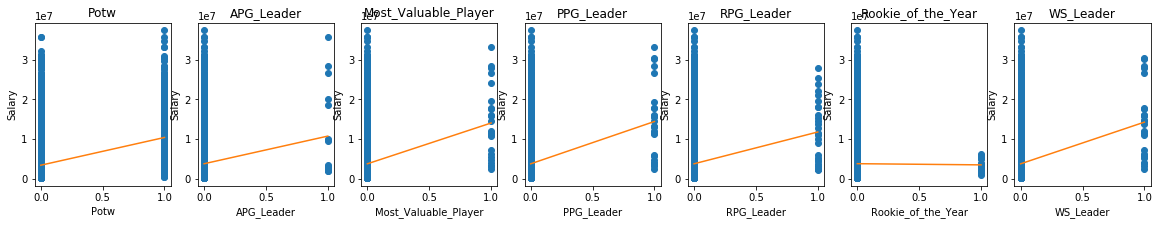

In [5]:
#scatter plot
plt.figure(figsize=(20, 3))


# i: index
for i, col in enumerate(features_title.columns):
    plt.subplot(1, 7, i+1)
    x = features_title[col]
    y = salary
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Salary')
    

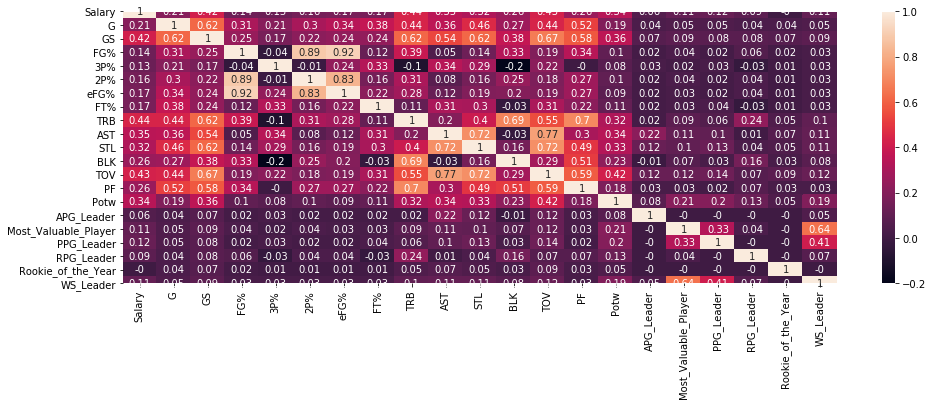

In [6]:
#correlation
all_data = data[['Salary','G','GS','FG%','3P%','2P%','eFG%','FT%','TRB','AST','STL','BLK','TOV','PF','Potw','APG_Leader','Most_Valuable_Player','PPG_Leader','RPG_Leader','Rookie_of_the_Year','WS_Leader']]
import seaborn as sns
correlation_matrix = all_data.corr().round(2)
# annot = True to print the values inside the square
plt.figure(figsize = (16,5))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [7]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import matplotlib.cm as cm
from IPython.display import display
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_selection import f_regression
from statsmodels.stats.anova import anova_lm

In [8]:
X = sm.add_constant(features_stats)
lm1=sm.OLS(salary,X).fit()
lm1.summary()

/Users/shirley/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     323.8
Date:                Sun, 06 Oct 2019   Prob (F-statistic):               0.00
Time:                        23:27:47   Log-Likelihood:            -1.4947e+05
No. Observations:                9003   AIC:                         2.990e+05
Df Residuals:                    8989   BIC:                         2.991e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.175e+05   2.53e+05     -1.254      0.210   -8.14e+05    1.79e+05
G          -2.212e+04   2327.090     -9.507      0.000   -2.67e+04   -1.76e+04
GS          2.399e+04   2378.020     10.087      0.000    1.93e+04    2.86e+04
FG%        -2.303e+07   1.76e+06    -13.116      0.000   -2.65e+07   -1.96e+07
3P%         2.542e+04   3.38e+05      0.075      0.940   -6.36e+05    6.87e+05
2P%         6.514e+06   9.35e+05      6.967      0.000    4.68e+06    8.35e+06
eFG%        1.728e+07   1.53e+06     11.278      0.000    1.43e+07    2.03e+07
FT%         1.491e+06   2.59e+05      5.755      0.000    9.83e+05       2e+06
TRB         8.507e+05   3.06e+04     27.839      0.000    7.91e+05    9.11e+05
AST          5.12e+05   4.52e+04     11.332      0.000    4.23e+05    6.01e+05
STL        -8.242e+05   1.49e+05     -5.542      0.000   -1.12e+06   -5.33e+05
BLK         4.085e+05   1.17e+05      3.487      0.000    1.79e+05    6.38e+05
TOV          6.65e+05   1.12e+05      5.935      0.000    4.45e+05    8.85e+05
PF         -1.098e+06   8.05e+04    -13.635      0.000   -1.26e+06    -9.4e+05
==============================================================================
Omnibus:                     3335.104   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16843.984
Skew:                           1.723   Prob(JB):                         0.00
Kurtosis:                       8.747   Cond. No.                     3.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
X2 = sm.add_constant(features_title)
lm2=sm.OLS(salary,X2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     178.0
Date:                Sun, 06 Oct 2019   Prob (F-statistic):          7.43e-248
Time:                        23:27:47   Log-Likelihood:            -1.5061e+05
No. Observations:                9003   AIC:                         3.012e+05
Df Residuals:                    8995   BIC:                         3.013e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3.346e+06   4.84e+04     69.111      0.000    3.25e+06    3.44e+06
Potw                  6.511e+06   2.15e+05     30.240      0.000    6.09e+06    6.93e+06
APG_Leader            3.991e+06   1.12e+06      3.556      0.000    1.79e+06    6.19e+06
Most_Valuable_Player  1.382e+06   1.22e+06      1.130      0.258   -1.02e+06    3.78e+06
PPG_Leader            3.861e+06   9.92e+05      3.890      0.000    1.92e+06    5.81e+06
RPG_Leader            4.498e+06   8.54e+05      5.270      0.000    2.82e+06    6.17e+06
Rookie_of_the_Year   -1.958e+06   1.03e+06     -1.909      0.056   -3.97e+06    5.29e+04
WS_Leader             1.914e+06   1.23e+06      1.550      0.121   -5.07e+05    4.33e+06
==============================================================================
Omnibus:                     4182.156   Durbin-Watson:                   1.658
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23750.052
Skew:                           2.204   Prob(JB):                         0.00
Kurtosis:                       9.624   Cond. No.                         33.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# POTW v.s. Stats

In [10]:
potw = data['Potw']
features_stats

,G,GS,FG%,3P%,2P%,eFG%,FT%,TRB,AST,STL,BLK,TOV,PF
0,43,0,0.474,0.000,0.474,0.474,0.568,2.1,0.3,0.1,0.3,0.5,0.9
1,67,19,0.413,0.240,0.432,0.425,0.857,1.8,3.1,0.8,0.1,1.6,2.2
2,68,0,0.509,0.333,0.512,0.512,0.653,5.3,0.4,0.4,0.4,0.6,3.2
3,66,66,0.394,0.296,0.459,0.453,0.879,3.9,10.5,2.2,0.1,3.6,2.5
4,78,13,0.462,0.308,0.477,0.475,0.757,4.8,1.8,0.6,0.3,1.6,2.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8998,49,2,0.433,0.333,0.478,0.485,0.869,2.6,2.2,0.9,0.3,0.8,1.1
8999,41,1,0.455,0.321,0.531,0.513,0.682,1.3,0.4,0.2,0.2,0.4,0.8
9000,81,81,0.527,0.349,0.564,0.557,0.644,6.5,2.5,1.5,0.4,1.5,2.4
9001,81,81,0.418,0.324,0.477,0.480,0.829,3.7,8.1,0.9,0.2,3.8,1.7


In [11]:
X = sm.add_constant(features_stats)
logit_model = sm.Logit(potw,X).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.105203
         Iterations 10


/Users/shirley/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Potw   No. Observations:                 9003
Model:                          Logit   Df Residuals:                     8989
Method:                           MLE   Df Model:                           13
Date:                Sun, 06 Oct 2019   Pseudo R-squ.:                  0.5081
Time:                        23:33:00   Log-Likelihood:                -947.14
converged:                       True   LL-Null:                       -1925.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.9613      1.247    -15.202      0.000     -21.406     -16.517
G              0.0092      0.008      1.208      0.227      -0.006       0.024
GS             0.0270      0.006      4.525      0.000       0.015       0.039
FG%            2.8424      3.193      0.890      0.373      -3.416       9.101
3P%            0.7365      0.556      1.324      0.186      -0.354       1.827
2P%            0.1138      2.101      0.054      0.957      -4.004       4.232
eFG%           4.6641      2.496      1.869      0.062      -0.227       9.555
FT%            8.0144      0.905      8.856      0.000       6.241       9.788
TRB            0.3289      0.034      9.671      0.000       0.262       0.396
AST            0.0828      0.042      1.963      0.050       0.000       0.166
STL            0.7106      0.155      4.578      0.000       0.406       1.015
BLK            0.5328      0.116      4.601      0.000       0.306       0.760
TOV            1.3414      0.122     11.011      0.000       1.103       1.580
PF            -0.8056      0.127     -6.356      0.000      -1.054      -0.557
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""